<a href="https://colab.research.google.com/github/studerlukas/Studer-Lukas/blob/main/CodingTask1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Science Fundamentals for DCBP, S. Haug, University of Bern 

# Coding Task 1

- Deadline (upload to Ilias): 2022-03-22 17:00
- Estimated effort: 2-5 hours (if you don't progress after 2 hours of trying, search for help, ChatGPT, Google, colleagues, course tutor)
- Data on Ilias: CCD-Data with metadata file CCD-Metadata


## Tasks (maximum 12.5 points)

- **CT-1.1** Write a method (function) which removes the header information in the 
datafile and saves that information into a separate textfile. [0.5 points] 
- **CT-1.2** Write a function which reduces the data resolution by merging/averaging columns such that there is only one column per 1 nm. [2.0 points]  
- **CT-1.3** Now generalize the above merging so that it works for any number nm er column. [2.0 points]
- **CT-1.4** Implement the saving of the reduced dataset to a file. Do this (1) by writing an explicit loop (write line by line) and (2) by using pandas methods. Measure the running times of the two approaches. [2.0 points]
- **CT-1.5** Write a function which takes two wavelengths as input and plots the difference of the data at these lengths over time. [2.0 points] 
- **CT-1.6** Let the x-axis be in seconds, label the axes with names and units, label the plot with color and legend, make a title for the plot. Save the plot to a file. [2.0 points]
- **CT-1.7** Plot the full and some reduced datasets in the same figure. Is there any visual difference? [2.0 points]

**Declaration:** All excercises solved were solved with the help of ChatGPT

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive

#CT-1.1

drive.mount('/content/drive')
path = '/content/drive/MyDrive/DSF/CCD-Data.txt'
def remove_header(in_file, n, out_file):
  df = pd.read_csv(in_file, delimiter='\t', header=n)
  header = pd.read_csv(in_file, delimiter='\t', header=None, nrows=n-1)
  header.to_csv(out_file, sep='\t', header=False, index=False)
  return df
df = remove_header(path, 13, '/content/drive/MyDrive/DSF/header_info.txt')
df = df.drop(df.index[-1])

df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,Unnamed: 1,316.6137,316.7492,316.8847,317.0203,317.1558,317.2913,317.4268,317.5623,...,778.9703,779.089,779.2076,779.3263,779.4449,779.5636,779.6822,779.8008,779.9194,780.0381
0,2018-10-25 10:32:04.789000,1540456324789,0.329672,0.329672,0.329672,0.090294,-0.716926,-1.829304,-0.686330,-0.428776,...,-0.038483,-0.039623,-0.036920,-0.037309,-0.037299,-0.037476,-0.036856,-0.036853,-0.039100,-0.035545
1,2018-10-25 10:32:04.878000,1540456324878,-0.044412,-0.044412,-0.044412,0.157632,-0.672423,-2.183981,-0.492421,-0.000000,...,-0.039428,-0.038486,-0.037309,-0.036357,-0.037289,-0.038728,-0.037214,-0.036902,-0.040210,-0.038165
2,2018-10-25 10:32:04.962000,1540456324962,0.338219,0.338219,0.338219,0.330993,-0.879836,-0.000000,-0.559845,-0.000000,...,-0.037725,-0.037534,-0.036560,-0.036152,-0.036554,-0.036875,-0.037351,-0.036746,-0.038686,-0.036903
3,2018-10-25 10:32:05.046000,1540456325046,-0.049682,-0.049682,-0.049682,0.519086,-0.681150,-0.000000,-0.417230,-0.000000,...,-0.037613,-0.037168,-0.036369,-0.034549,-0.036252,-0.037948,-0.036713,-0.035706,-0.038203,-0.036822
4,2018-10-25 10:32:05.129000,1540456325129,0.335086,0.335086,0.335086,-0.041393,-0.000000,-1.802774,-0.510417,-0.000000,...,-0.040919,-0.038288,-0.035840,-0.035638,-0.039504,-0.040093,-0.039953,-0.037656,-0.038082,-0.035900


In [ ]:
#CT-1.2
newdf = df.rename(columns=lambda x: x.split('.')[0])
group_average =  newdf.iloc[:,2:].groupby(level=0, axis=1,).mean()
group_average.head()

,316,317,318,319,320,321,322,323,324,325,...,771,772,773,774,775,776,777,778,779,780
0,0.329672,-0.166957,-0.064746,0.133130,0.123705,-0.249831,0.271327,-0.093151,-0.123458,-0.026454,...,-0.038555,-0.038021,-0.039290,-0.038654,-0.036496,-0.038835,-0.038145,-0.038333,-0.037679,-0.035545
1,-0.044412,-0.411839,-0.133472,2.032979,-0.387814,-0.031617,0.322955,1.744725,-0.051639,-0.147937,...,-0.038100,-0.038118,-0.038622,-0.038308,-0.036896,-0.039010,-0.038400,-0.037930,-0.037812,-0.038165
2,0.338219,-0.094507,-0.024912,0.061890,-0.226986,0.107871,0.121011,-0.208504,-0.418836,0.005751,...,-0.038063,-0.038303,-0.039200,-0.038397,-0.036932,-0.038245,-0.037664,-0.037514,-0.037057,-0.036903
3,-0.049682,0.027980,-0.008338,-0.088350,0.070348,-0.013674,0.307321,0.159532,-0.047932,0.080549,...,-0.037775,-0.037678,-0.038711,-0.038133,-0.036972,-0.038177,-0.037273,-0.036996,-0.036614,-0.036822
4,0.335086,-0.162378,-0.102281,0.045717,-0.088278,0.042099,0.304675,-0.261077,-0.009424,0.153932,...,-0.038433,-0.038135,-0.038991,-0.038178,-0.037010,-0.038540,-0.038076,-0.037606,-0.038132,-0.035900


In [ ]:
#CT-1.3
def merge_per_x_nm(dataframe, x_nm):
  new = lambda s : (int(s.split('.')[0]) // x_nm)* x_nm
  newer = dataframe.iloc[:,2:].rename(new, axis=1 )
  combined =  newer.iloc[:,2:].groupby(level=0, axis=1,).mean()  
  combined.insert(0, 'timestamp', dataframe['Unnamed: 1'])
  return combined
  
merge_xnm = merge_per_x_nm(df, 7)
merge_xnm.head()


,timestamp,315,322,329,336,343,350,357,364,371,...,714,721,728,735,742,749,756,763,770,777
0,1540456324789,-0.033855,0.018673,0.047151,0.084119,0.129875,0.205774,0.383298,0.304882,0.343545,...,-0.045100,-0.043964,-0.042901,-0.040907,-0.040257,-0.040084,-0.040667,-0.039690,-0.038360,-0.037967
1,1540456324878,0.174568,0.241746,0.067790,0.161859,0.639420,0.380921,0.456400,0.421213,0.422349,...,-0.045235,-0.044272,-0.042837,-0.040982,-0.040368,-0.040517,-0.040704,-0.040058,-0.038225,-0.038047
2,1540456324962,-0.032100,-0.046206,0.073599,0.142090,0.239440,0.345834,0.418892,0.411034,0.411165,...,-0.045314,-0.044186,-0.042902,-0.041196,-0.040356,-0.040342,-0.041128,-0.039906,-0.038244,-0.037396
3,1540456325046,-0.000936,0.090321,0.025177,0.066632,0.190999,0.240002,0.359638,0.342814,0.332172,...,-0.044907,-0.043583,-0.042247,-0.040274,-0.039961,-0.039727,-0.040071,-0.039184,-0.037878,-0.036957
4,1540456325129,-0.046616,0.044862,0.107495,0.125382,0.112594,0.215349,0.367461,0.303158,0.318711,...,-0.045195,-0.043881,-0.042767,-0.040734,-0.040024,-0.040136,-0.040473,-0.039615,-0.038274,-0.037847


In [ ]:
#CT-1.4

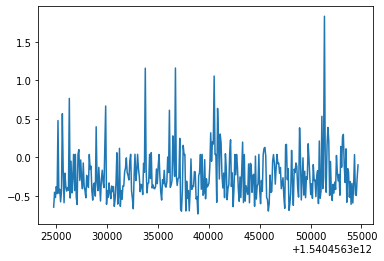

In [ ]:
#CT-1.5
import matplotlib.pyplot as plt

def plot_difference(df, wav1, wav2):
    diff = df[wav1] - df[wav2]
    plt.plot(df['Unnamed: 1'], diff)
    plt.show()
plot_difference(df, '317.4268', '779.089')

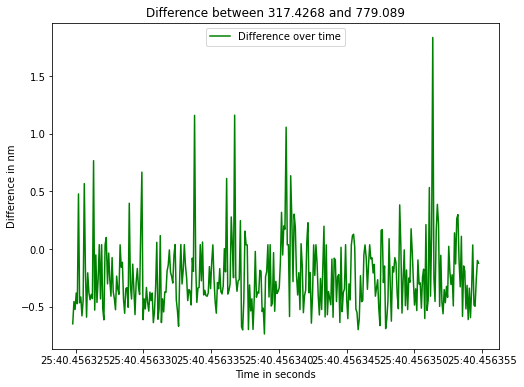

In [ ]:
#CT-1.6
import pandas as pd
import matplotlib.pyplot as plt
def plot_difference2(df, wav1, wav2):
    df['timestamp'] = pd.to_datetime(df['Unnamed: 1'])
    df = df.set_index('timestamp')
    diff = df[wav1] - df[wav2]
    plt.figure(figsize=(8,6))
    plt.plot(diff.index, diff, color='green')
    plt.title(f"Difference between {wav1} and {wav2}")
    plt.xlabel("Time in seconds")
    plt.ylabel("Difference in nm")
    plt.savefig("difference_plot.png", dpi=400)
    plt.legend(['Difference over time'], loc='upper center')
    plt.show()
plot_difference2(df,'317.4268', '779.089')

In [ ]:
#CT-1.7